# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Требуется научиться определять рыночную стоимость объектов недвижимости. Основной задачей является установление параметров. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


**Цель исследования**:
1. Анализ данных сервиса Яндекс.Недвижимость в целях поиска закономерностей, существующих на рынке недвижимости.
2. Сравнение характеристик, формирующих стоимость недвижимого имущества.

**Ход исследования**

Данные о поведении пользователей можно получить `https://code.s3.yandex.net/datasets/real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор и предобработка данных. 

 
Исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.



### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv('data/project_3/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
66,6,3450000.0,34.0,2015-12-16T00:00:00,1,2.60,17.0,17.4,8,False,...,11.5,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,186.0
17314,9,5150000.0,43.0,2017-09-03T00:00:00,1,2.80,20.0,20.0,19,NaN,...,8.0,NaN,Санкт-Петербург,15654.0,7682.0,1.0,725.0,0.0,NaN,353.0
17060,17,6600000.0,65.0,2017-12-04T00:00:00,2,2.75,16.0,36.0,13,NaN,...,10.7,NaN,Санкт-Петербург,34620.0,12036.0,0.0,NaN,0.0,NaN,122.0
6069,20,12000000.0,87.0,2018-06-26T00:00:00,3,NaN,21.0,NaN,11,NaN,...,NaN,2.0,Санкт-Петербург,10552.0,13063.0,0.0,NaN,0.0,NaN,60.0
1144,6,3500000.0,35.0,2017-04-18T00:00:00,1,2.90,4.0,19.6,4,NaN,...,8.0,1.0,Санкт-Петербург,21304.0,9649.0,0.0,NaN,1.0,586.0,342.0
13168,11,3750000.0,42.0,2017-12-14T00:00:00,1,NaN,12.0,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,33538.0,12258.0,0.0,NaN,0.0,NaN,40.0
23174,18,3200000.0,66.0,2016-06-21T00:00:00,3,NaN,5.0,45.0,3,NaN,...,7.0,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,143.0
10675,6,4900000.0,57.5,2017-10-01T00:00:00,3,2.50,9.0,38.0,2,False,...,6.5,2.0,Санкт-Петербург,45643.0,13756.0,1.0,373.0,0.0,NaN,43.0
7183,9,3180000.0,30.0,2018-09-06T00:00:00,1,2.70,9.0,14.0,5,NaN,...,7.8,NaN,посёлок Шушары,23451.0,29237.0,0.0,NaN,1.0,683.0,96.0
18654,13,3950000.0,39.0,2018-01-12T00:00:00,1,2.75,14.0,16.0,11,NaN,...,12.0,2.0,Санкт-Петербург,50737.0,15776.0,1.0,183.0,0.0,NaN,3.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


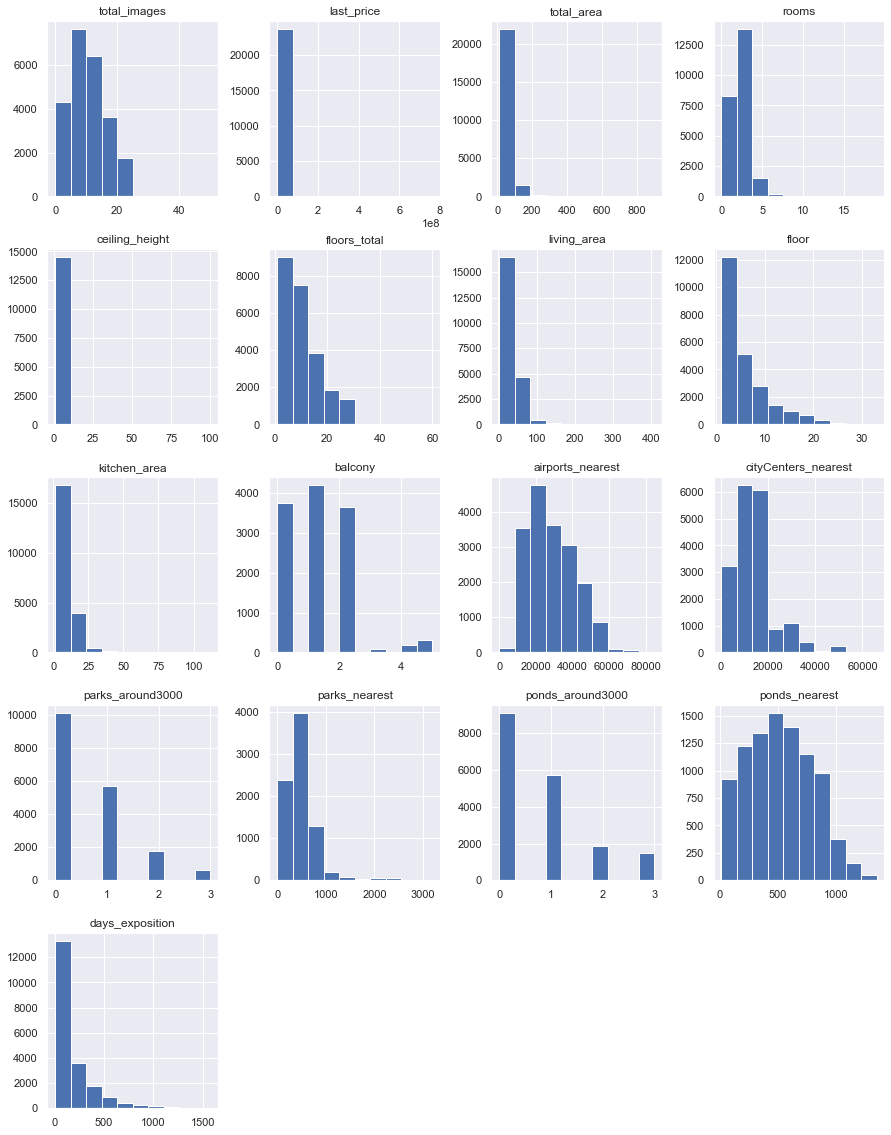

In [7]:
df.hist(figsize=(15, 20));

### Предобработка данных

#### Удаление пропусков

In [8]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Пропущенные значения обнаружены в большинстве столбцов полученной даты. 

**Высота потолков**

In [9]:
df[df['ceiling_height'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


Высота потолков зависит от типа и специфики строения. В нашем df не достает информации о годе и типаже постройки. В связи с этим я заполню пустые данные медианой значений по столбцу в соответтсвии с районом местонахождения.

In [10]:
for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name, 'ceiling_height'].median()
    df.loc[(df['ceiling_height'].isna()) & (df['locality_name'] == locality_name), 'ceiling_height'] = median
    
# все, что не заполнилось, заполняет общей медианой по Лен. области (121 пропуск заменим медианой)
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()

**Расстояние до центра**

In [11]:
df[df['cityCenters_nearest'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.56,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


Заполняем пропуски в расстоянии до центра в зависимости от населенного пункта. Если останутся пропуски, то бедет некорректно до-заполнять медианой.

In [12]:
for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name, 'cityCenters_nearest'].median()
    df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == locality_name), 'cityCenters_nearest'] = median
    

**Общее количество этажей в доме**

In [13]:
df[df['floors_total'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.7,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.7,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.7,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.7,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.7,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


In [14]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].mean())

В данных не хватает всего 86 значений количества этажей в здании, поэтому считаю, что заполнение средним не должно сильно исказить информацию.

**Жилая площадь**

In [15]:
df[df['living_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.70,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.56,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.70,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


В метраже квартиры просто ошибиться, поэтому я заполню значения неизменными.

**Апартаменты**

In [16]:
df[df['is_apartment'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [17]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Пропущенных значений в столбце is_apartment очень много, но так же хозяин мог не указывать данный параметр, если объект недвижимости не является апартаментами. Беря в расчет данную гипотезу, приведет пропущенные значения к параметру False.

In [18]:
df['is_apartment'] = df['is_apartment'].fillna(False)

**Площадь кухни**

In [19]:
df[df['kitchen_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.56,9.0,NaN,2,False,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,False,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.70,22.0,NaN,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.70,13.0,NaN,13,False,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0


In [20]:
df.groupby('studio')['kitchen_area'].mean()

studio
False    10.569807
True           NaN
Name: kitchen_area, dtype: float64

kitchen_area для квартир категории studio может быть приравнена к 0.

In [21]:
df.loc[df['studio'] == True, 'kitchen_area'] = df.loc[df['studio'] == True, 'kitchen_area'].fillna(0)

**Количество балконов**

In [22]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Существует большая вероятность того, что продавец мог не указать число балконов, если они отсутствуют в квартире. Беря даннуя гипотезу во внимание, заполним пустые значения соответствующим образом.

In [23]:
df['balcony'] = df['balcony'].fillna(0)

**Название населённого пункта**

In [24]:
df[df['locality_name'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,False,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.70,4.0,42.6,2,False,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.70,24.0,15.6,3,False,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.70,24.0,33.1,21,False,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.70,5.0,30.8,5,False,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


Объявления с пропущенными значениями по месту нахождения не имеют смысла, так же их мало, поэтому данные объявления я удалю.

In [25]:
df = df.dropna(subset=['locality_name']).reset_index(drop=True)

Данные столбцы останутся неизменными, так как для расчета параметров требуется точная геопозиция объекта продажи: airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest.      
         
           
         
           


Колонка days_exposition так же останется неизменной, так как существует вероятность того, что объевление еще не было снято с публикации.

In [26]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,0.000000


**Вывод:**

<div style="border:solid lightgreen 2px; padding: 20px">
Были удалены строки с отсутствующим значением locality_name, пропущенные значения is_apartment приведены к значению False, пропущенные значения balcony приравнены к 0, пропущенные значения ceiling_height расчитаны по медиане значений ceiling_height, пропущенные значения floors_total расчитаны по среднему, kitchen_area осносящихся к studio приравнены к 0. Остальные параметры остались без изменений.
<br>
<br>  
Существует несколько основных причин появления пропущенных значений в дате. Одну часть данных заполняли хозяева, а вторая рассчитывалась автоматически. Существует вероятность того, что хозяин не заполнял значения по незнанию (специально) либо пропустил значения по невнимательности. Вторая часть была не заполнена по технической причине, ошибке в получении необходимых данных.
 


#### Изменение типов данных

In [27]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

**Столбцы для преобразования**

<li>first_day_exposition -> Datetime (данные содержат дату)
<li>is_apartment -> Bool (после корректировки пустых значений он уже трансформировался в Bool тип данных) 
<li>floors_total -> Int (целочисленные значения)
<li>balcony, parks_around3000, ponds_around3000 -> Category (количество четко ограничено)
    
В airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, days_exposition есть пропущенные значения, поэтому привести к Int их не получится, оставим как есть.

In [28]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype("category")
df['parks_around3000'] = df['parks_around3000'].astype("category")
df['ponds_around3000'] = df['ponds_around3000'].astype("category")
df['last_price'] = df['last_price'].astype('int')

### Обработка дубликатов

Проверка, есть ли полные дубликаты

In [29]:
df.duplicated().sum()

0

Приведение буквы ё к е

In [30]:
df['locality_name']  = df['locality_name'].str.replace('ё', 'е')

Создание столбца для хранения типа городского объекта

In [31]:
df['area_type'] = df['locality_name'].apply(
    lambda title: ' '.join(word for word in title.split(' ') if word.islower())
    )

In [32]:
df['area_type'] = df['area_type'].replace('', 'город')

In [33]:
df['area_type'].unique()

array(['город', 'поселок', 'городской поселок', 'деревня',
       'поселок городского типа', 'садовое товарищество', 'село',
       'поселок городского типа имени', 'поселок станции',
       'садоводческое некоммерческое товарищество',
       'поселок 69-й километр', 'поселок при железнодорожной станции',
       'коттеджный поселок'], dtype=object)

Очистка столбца locality_name от типов городских объектов

In [34]:
stop_words = ['поселок','садоводческое', 'некоммерческое', 'коттеджный', 'поселок станции', '69-й километр',
            'городской', 'село', 'городского', 'типа', 'железнодорожной', 'садовое', 'товарищество', 'деревня',
            'станции', 'имени', 'при', 'имени']
    
df['locality_name'] = df['locality_name'].apply(
    lambda title: ' '.join(word for word in title.split() if not word in stop_words)
)

In [35]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [36]:
df[['locality_name','area_type']].head(10)

,locality_name,area_type
0,Санкт-Петербург,город
1,Шушары,поселок
2,Санкт-Петербург,город
3,Санкт-Петербург,город
4,Санкт-Петербург,город
5,Янино-1,городской поселок
6,Парголово,поселок
7,Санкт-Петербург,город
8,Мурино,поселок
9,Санкт-Петербург,город


**Вывод:**

<div style="border:solid lightgreen 2px; padding: 20px">
Были ликвидированы неявные дубли в колонке locality_name путем выделения типа городского объекта в отдельный столбец.

### Обработка аномалий

In [37]:
"""
Функция для обработки аномальных значений. Берет разницу между 3 и 1 квартилем, 
удаляя все, что не входит в эту область, беря во внимание коэффициент порогового значения, 
устанавливающийся вручную в соответствии со здравым смыслом. 
"""
def outlier_removal(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    
    iqr = q3-q1 # интерквартильное расстояние
    fence_low  = q1 - 2.5 * iqr # пороговое значение
    fence_high = q3 + 2.5 * iqr
    df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
    return df_out

**Высота потолков**

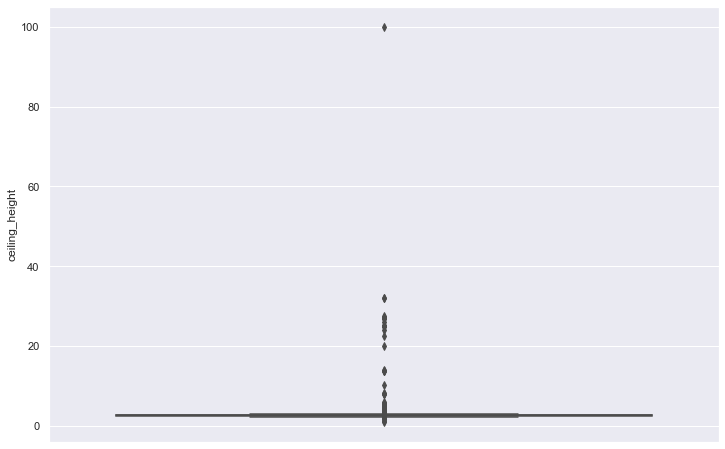

In [38]:
sns.boxplot(y="ceiling_height", data=df);

In [39]:
df['ceiling_height'].unique()

array([  2.7  ,   2.63 ,   3.03 ,   2.6  ,   2.64 ,   2.5  ,   2.67 ,
         2.55 ,   2.56 ,   3.05 ,   2.75 ,   2.9  ,   2.56 ,   2.8  ,
         3.   ,   2.65 ,   3.2  ,   2.61 ,   3.25 ,   3.45 ,   2.77 ,
         2.85 ,   2.525,   2.57 ,   4.15 ,   3.5  ,   3.3  ,   2.71 ,
         4.   ,   2.47 ,   2.73 ,   2.84 ,   3.1  ,   2.34 ,   3.4  ,
         2.52 ,   3.06 ,   2.72 ,   2.54 ,   2.51 ,   2.78 ,  13.85 ,
         2.76 ,  25.   ,   2.58 ,   3.7  ,   5.2  ,   2.87 ,   2.66 ,
         2.59 ,   2.   ,   2.45 ,   3.6  ,   3.9  ,   2.92 ,   3.11 ,
         3.13 ,   3.8  ,   3.15 ,   3.55 ,   3.16 ,   3.62 ,   3.12 ,
         2.53 ,   2.74 ,   2.96 ,   2.46 ,   5.3  ,   5.   ,   2.79 ,
         2.95 ,   4.06 ,   2.94 ,   3.82 ,   3.54 ,   3.53 ,   2.83 ,
         4.7  ,   2.4  ,   3.38 ,   3.01 ,   5.6  ,   3.65 ,   3.18 ,
         3.35 ,   2.3  ,   3.57 ,   2.48 ,   2.515,   2.62 ,   2.82 ,
         2.65 ,   3.98 ,   3.83 ,  27.   ,   3.52 ,   3.95 ,   3.75 ,
         2.88 ,   3.

In [40]:
df['ceiling_height'] = df['ceiling_height'].replace([32, 27, 26, 22.6, 10.3, 24, 100, 25, 20, 14, 27.5],[3.2, 2.7, 2.6, 2.26, 1.03, 2.4, 1., 2.5, 2.,1.4, 2.75])

In [41]:
df = outlier_removal(df, 'ceiling_height')

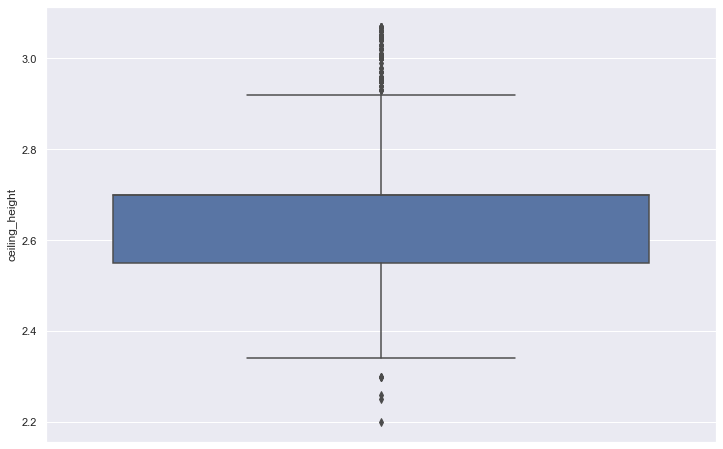

In [42]:
sns.boxplot(y="ceiling_height", data=df);

**Цена объекта**

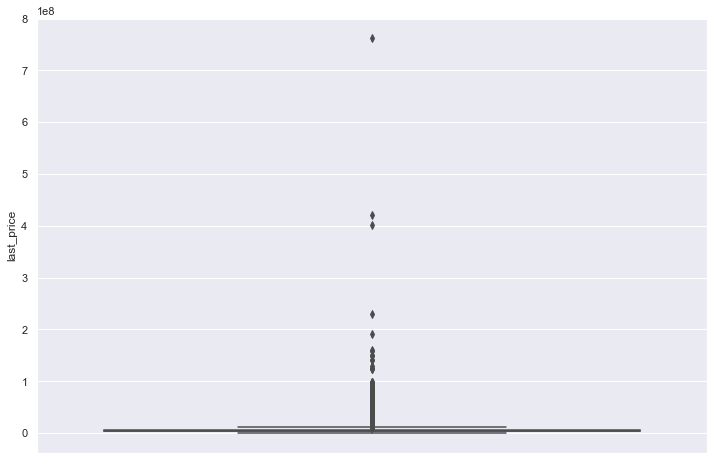

In [43]:
sns.boxplot(y='last_price', data=df);

In [44]:
df = outlier_removal(df, 'last_price')

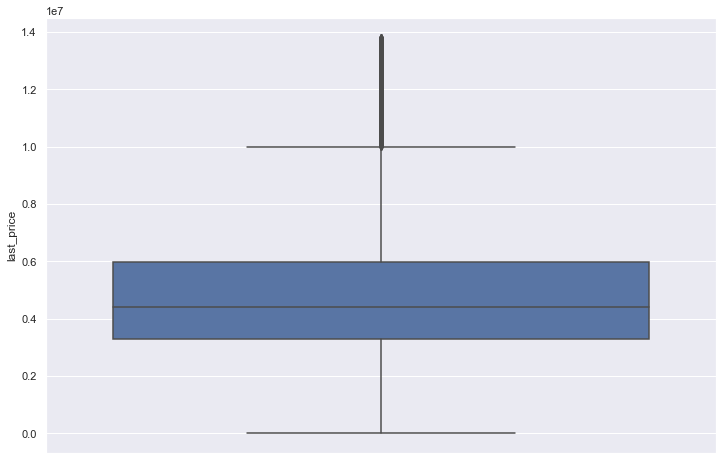

In [45]:
sns.boxplot(y='last_price', data=df);

**Количество комнат**

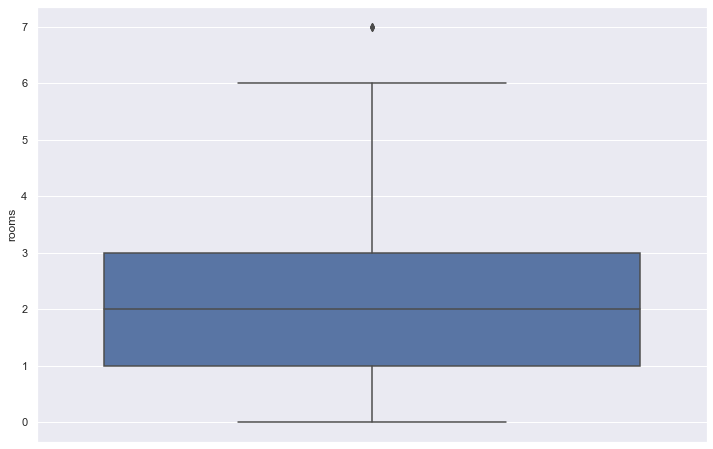

In [46]:
sns.boxplot(y='rooms', data=df);

In [47]:
df['rooms'].unique()

array([3, 1, 2, 4, 6, 0, 5, 7])

In [48]:
df = outlier_removal(df, 'rooms')

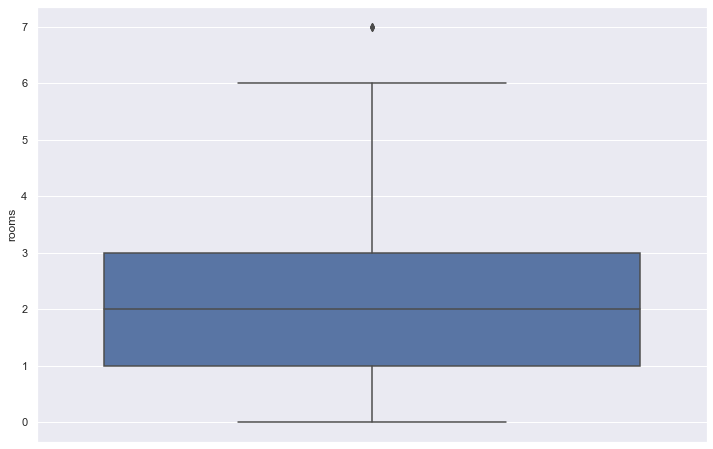

In [49]:
sns.boxplot(y='rooms', data=df);

In [50]:
df = df.drop(df.index[(df['rooms'] == 0)])

**Площадь кухни**

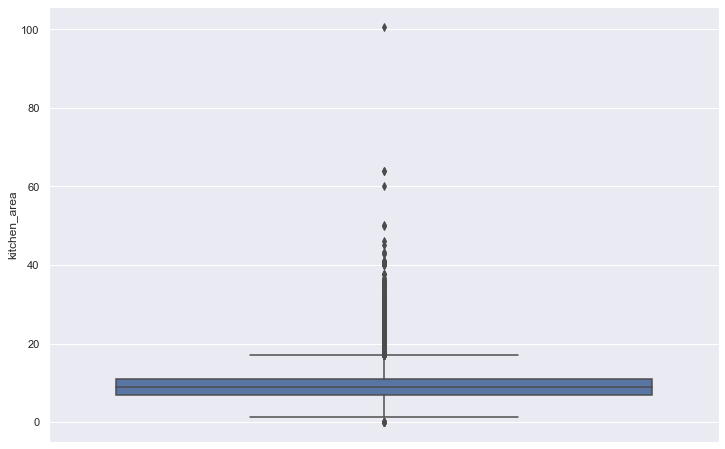

In [51]:
sns.boxplot(y="kitchen_area", data=df);

In [52]:
df = outlier_removal(df, 'kitchen_area')

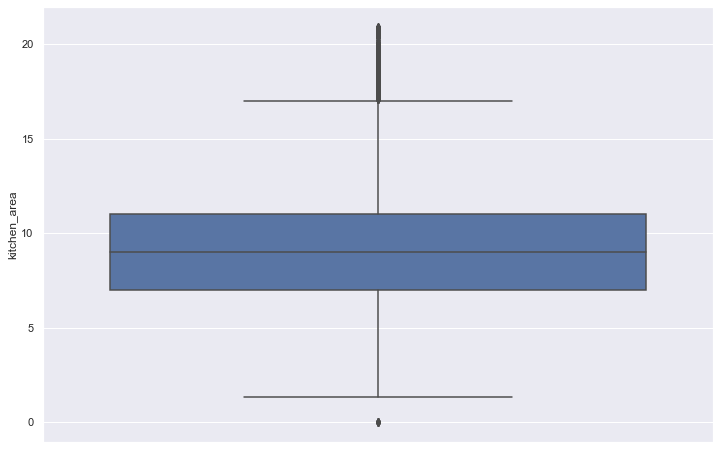

In [53]:
sns.boxplot(y="kitchen_area", data=df);

Были удалены строки, где kitchen_area была более 40.

**Общая площадь**

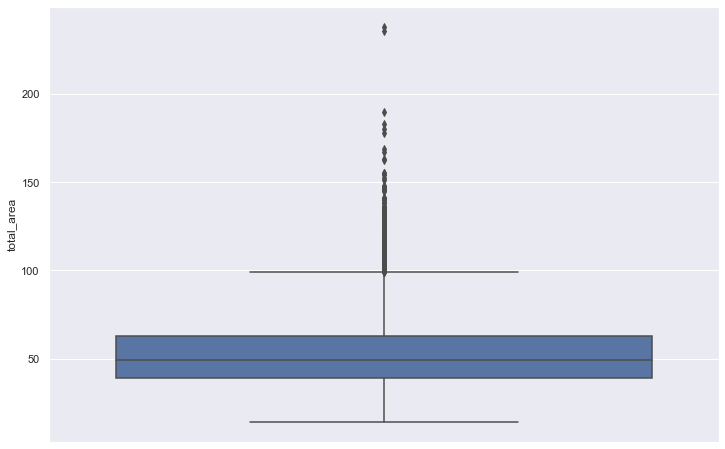

In [54]:
sns.boxplot(y="total_area", data=df);

In [55]:
df = outlier_removal(df, 'total_area')

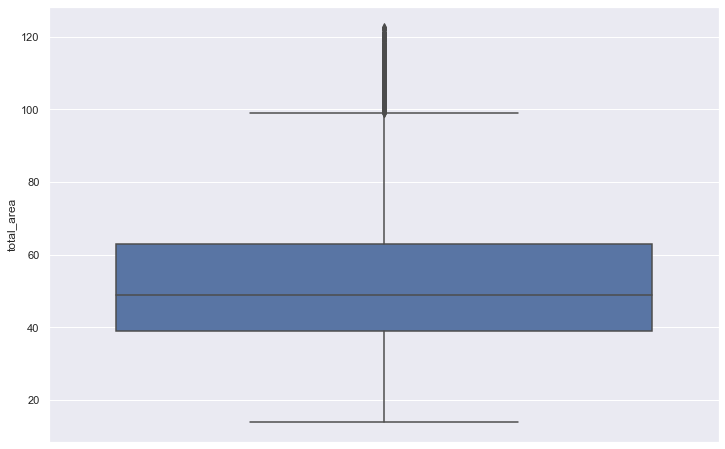

In [56]:
sns.boxplot(y="total_area", data=df);

**Вывод:**

<div style="border:solid lightgreen 2px; padding: 20px">
Скорректированы аномальные значения в колонках ceiling_height, last_price, rooms, kitchen_area, total_area, остальные колонки не имеют аномальных значений. В общей сложности удалено ~ 22% первоначальной даты.
 


### Посчитайте и добавьте в таблицу новые столбцы

**Добавление цены одного квадратного метра.**

In [57]:
df['m2_price'] = df['last_price'] / df['total_area']

**Добавление дня недели публикации объявления (0 — понедельник, 1 — вторник и так далее).**

In [58]:
df['week_day'] = pd.DatetimeIndex(df['first_day_exposition']).dayofweek

**Добавление месяца публикации объявления.**

In [59]:
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month

In [60]:
df['month'] = df['first_day_exposition'].dt.date #приводим к временному формату
df['month'] = df['first_day_exposition'].astype('datetime64[M]') 

**Добавление года публикации объявления.**

In [61]:
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [62]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_type,m2_price,week_day,month,year
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,поселок,82920.792079,1,2018-12-01,2018
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,город,92785.714286,3,2015-08-01,2015
5,10,2890000,30.4,2018-09-10,1,2.60,12,14.4,5,False,...,NaN,NaN,NaN,NaN,55.0,городской поселок,95065.789474,0,2018-09-01,2018
6,6,3700000,37.3,2017-11-02,1,2.64,26,10.6,6,False,...,0.0,NaN,0.0,NaN,155.0,поселок,99195.710456,3,2017-11-01,2017
7,5,7915000,71.6,2019-04-18,2,2.70,24,NaN,22,False,...,0.0,NaN,0.0,NaN,NaN,город,110544.692737,3,2019-04-01,2019


In [63]:
def alert_group_importance(row):
    if row['alert_group'] == 'высокий':
        if row['importance'] == 1:
            return 'высокий риск'
    
    if row['alert_group'] == 'средний':
        if row['importance'] == 1:
            return 'обратить внимание'
    
    if row['alert_group'] == 'критичный':
        if row['importance'] == 1:
            return 'блокер'    
    return 'в порядке очереди'

**Добавление типа этажа квартиры (значения — «первый», «последний», «другой»).**

In [64]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'  

In [65]:
df['floor_type'] = df.apply(floor_type, axis=1)

**Корректировка расстояния до центра города в километрах (переведите из м в км и округлите до целых значений).**

In [66]:
df['cityCenters_nearest'] = round(df['cityCenters_nearest'] / 1000)

### Проведите исследовательский анализ данных

**Общая площадь**

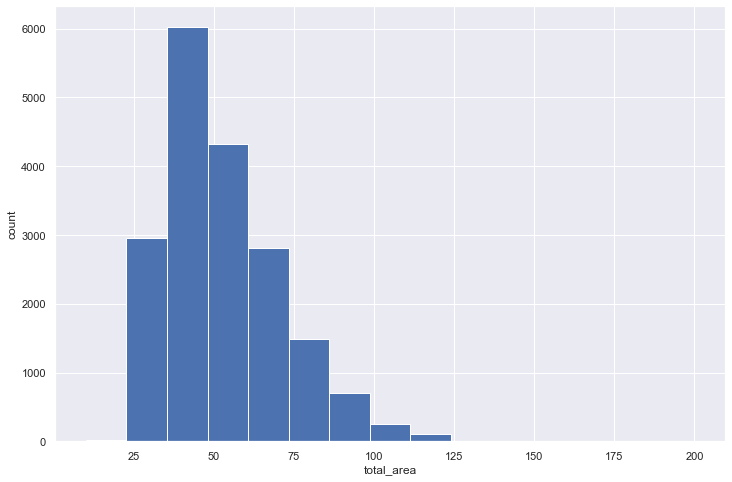

In [67]:
df['total_area'].hist(range=(10, 200), bins=15)
plt.xlabel('total_area')
plt.ylabel('count');

График общей площади немного смещен влево по причине того, что были удалены не все выбросы. Больше всего в продаже квартир ~ 50 кв. метров.

**Жилая площадь**

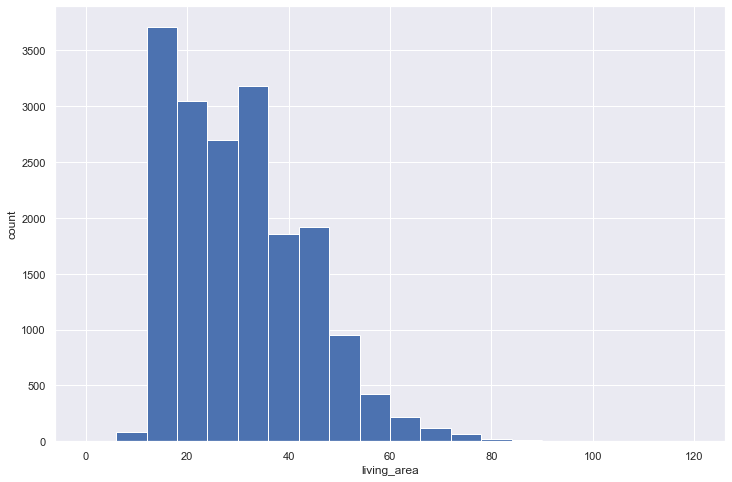

In [68]:
df['living_area'].hist(range=(0, 120), bins=20)
plt.xlabel('living_area')
plt.ylabel('count');

График жилой площади включает несколько пиков: ~ 20 и 50 кв. метров.

**Площадь кухни**

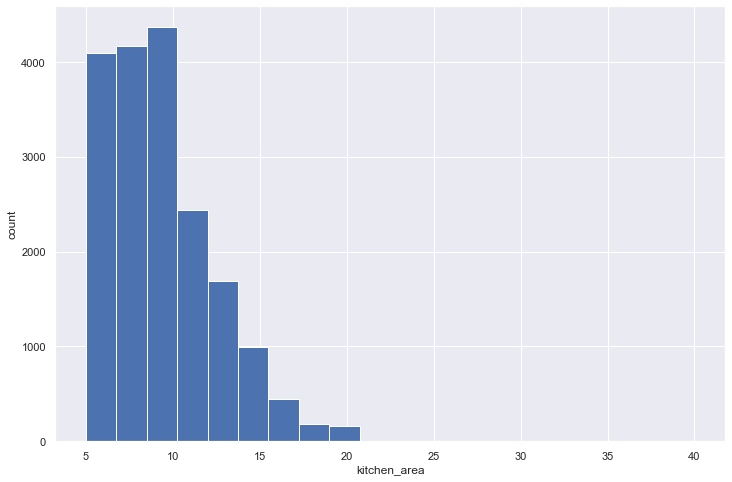

In [69]:
df['kitchen_area'].hist(range=(5, 40), bins=20);
plt.xlabel('kitchen_area')
plt.ylabel('count');

Самый распростаненный показатель площади кухни ~ 10 кв. метров.

**Цена объекта**

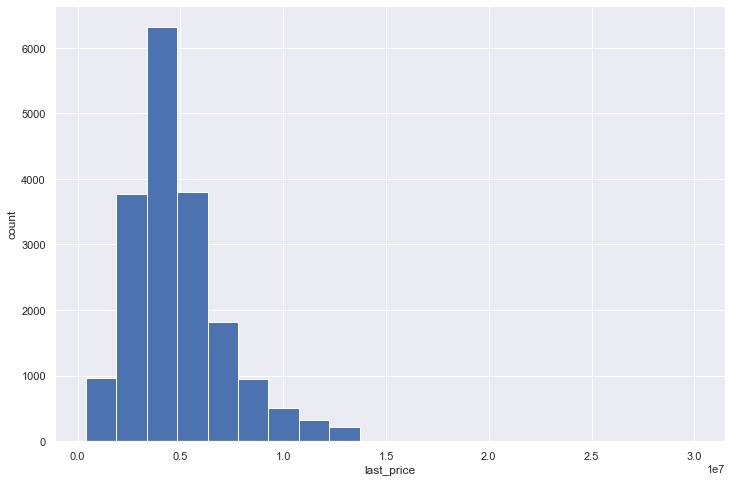

In [70]:
df['last_price'].hist(range=(400000, 30000000), bins=20)
plt.xlabel('last_price')
plt.ylabel('count');

Большинство квартир оцениваются ~ 500 000.

**Количество комнат**

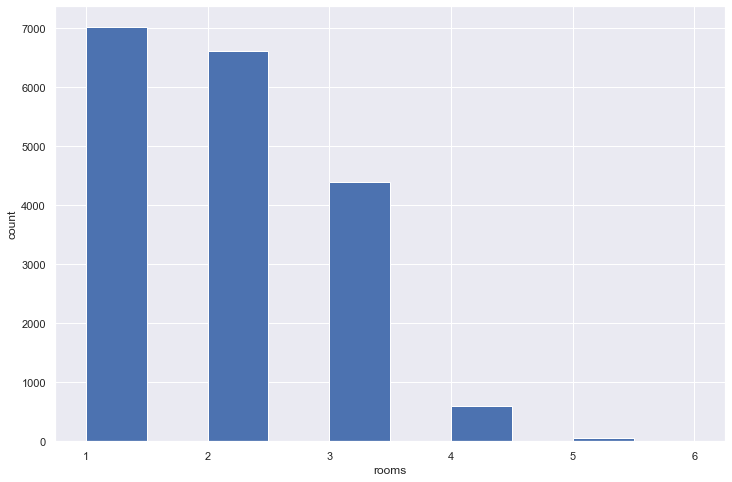

In [71]:
df['rooms'].hist(bins=10)
plt.xlabel('rooms')
plt.ylabel('count');

Количество 1 и 2 комнатных квартир схоже, с увеличением количества комнат уменьшается количество предложений.

**Высота потолков**

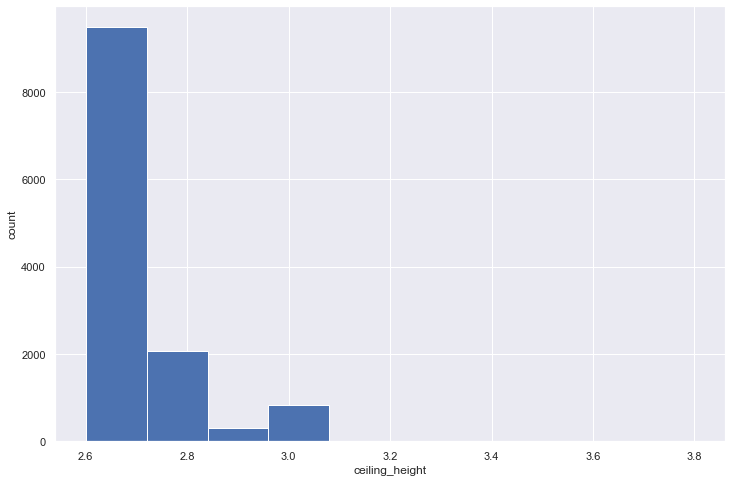

In [72]:
df['ceiling_height'].hist(range=(2.6, 3.8), bins=10);
plt.xlabel('ceiling_height')
plt.ylabel('count');

Подавляющее большинство квартир с высотой потолков 2.6 метра.

**Этаж квартиры**

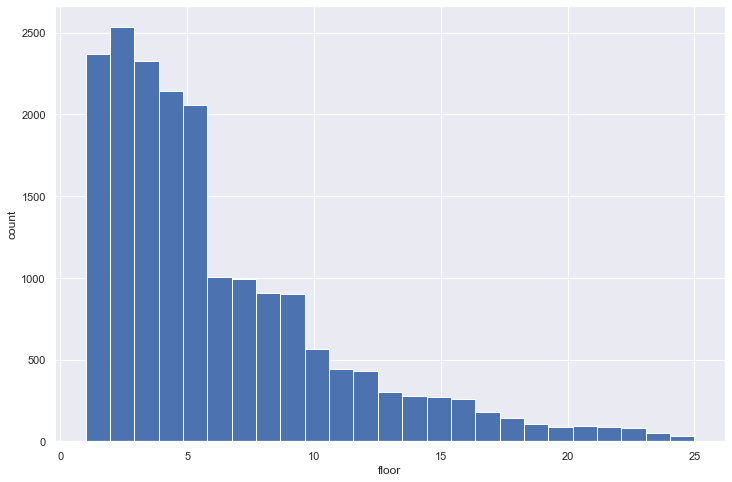

In [73]:
df['floor'].hist(range=(1, 25), bins=25);
plt.xlabel('floor')
plt.ylabel('count');

Большинство квартир располагаются на первых 5 этажах здания.

**Тип этажа квартиры («первый», «последний», «другой»)**

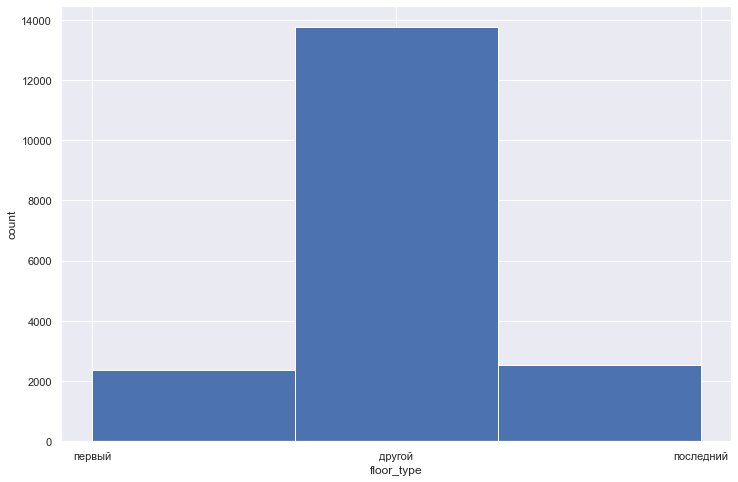

In [74]:
df['floor_type'].hist(bins=3);
plt.xlabel('floor_type')
plt.ylabel('count');

Большинство квартир не на первом и последнем этажах.

**Общее количество этажей в доме**

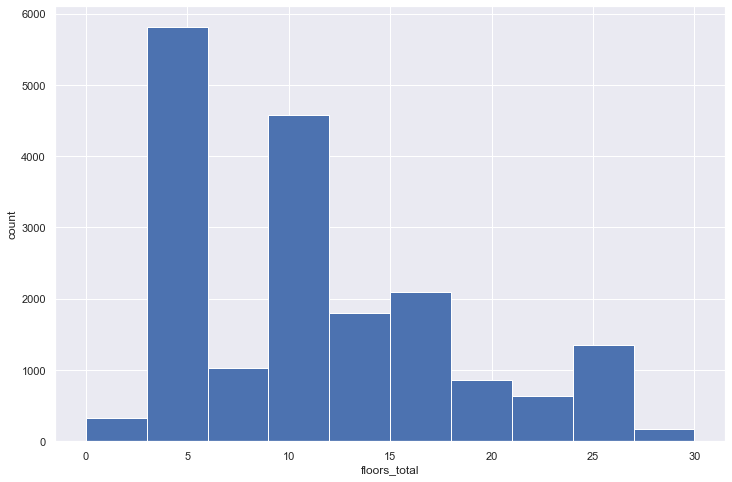

In [75]:
df['floors_total'].hist(range=(0, 30), bins=10);
plt.xlabel('floors_total')
plt.ylabel('count');

Большинство квартир состоят из 5 этажей, так же много 10-этажных строений.

**Расстояние до центра города в км**

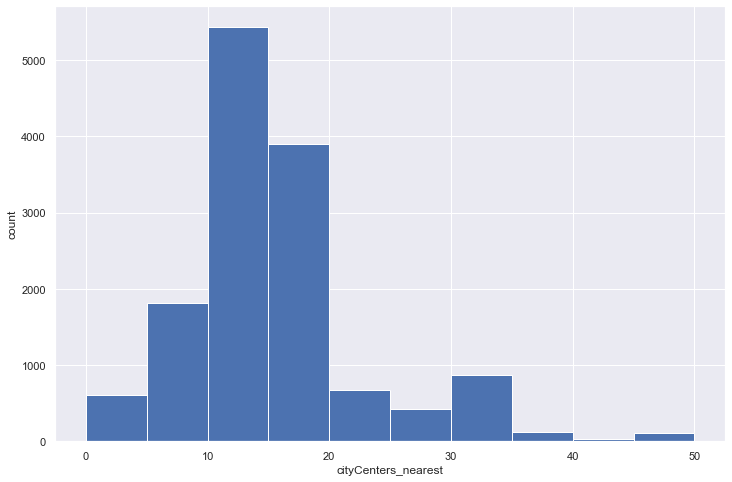

In [76]:
df['cityCenters_nearest'].hist(range=(0, 50), bins=10);
plt.xlabel('cityCenters_nearest')
plt.ylabel('count');

В среднем расстояние до центра города составляет 15 км.

**Расстояние до ближайшего аэропорта**

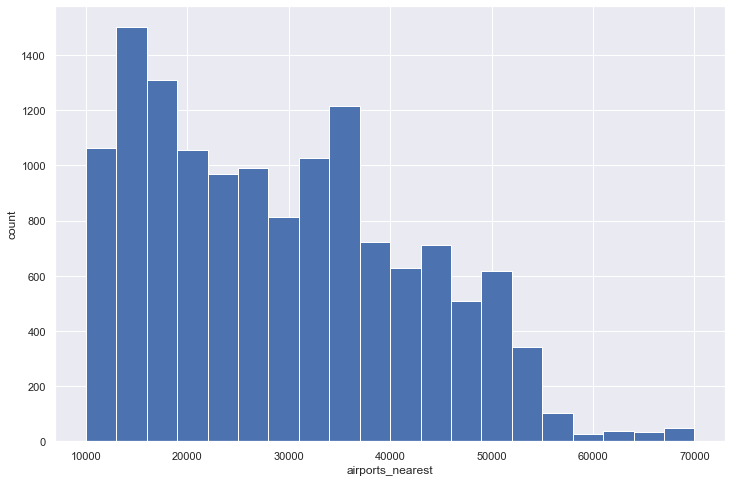

In [77]:
df['airports_nearest'].hist(range=(10000, 70000), bins=20);
plt.xlabel('airports_nearest')
plt.ylabel('count');

Расстояние до ближайшего аэропорта не имеет существенной динамики и составляет около 15 км.

**Расстояние до ближайшего парка**

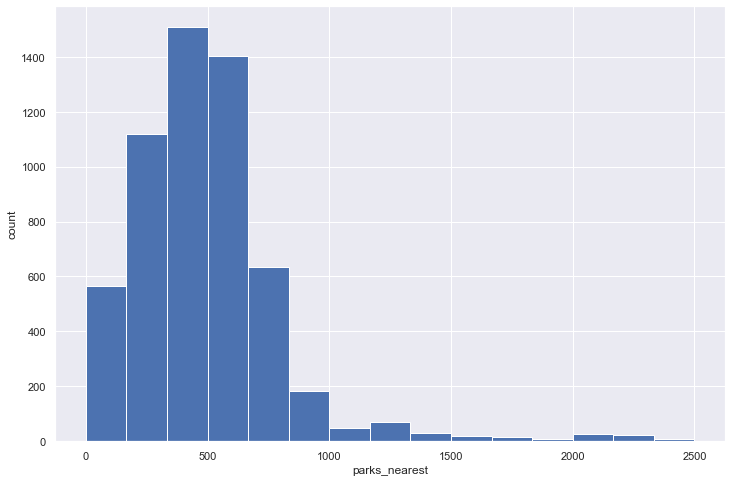

In [78]:
df['parks_nearest'].hist(range=(0, 2500), bins=15);
plt.xlabel('parks_nearest')
plt.ylabel('count');

До ближайшего парка в среднем около 500 метров.

**День и месяц публикации объявления**

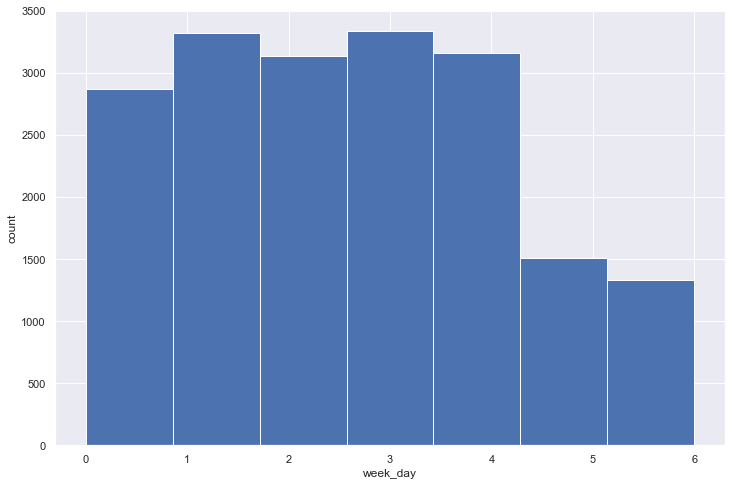

In [79]:
df['week_day'].hist(bins=7);
plt.xlabel('week_day')
plt.ylabel('count');

В основном объяления публикуются в рабочие дни, больше всего во вт и чт.

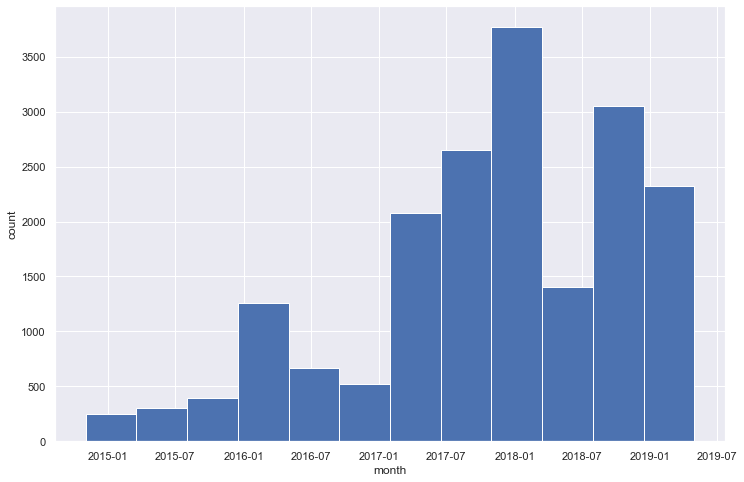

In [80]:
df['month'].hist(bins=12);
plt.xlabel('month')
plt.ylabel('count');

Пик публикаций объявлений приходится на февраль-апрель, сентябрь-ноябрь.

**Вывод:**

<div style="border:solid lightgreen 2px; padding: 20px">
       <li>График общей площади немного смещен влево по причине того, что были удалены не все выбросы. Больше всего в продаже квартир ~ 50 кв. метров.
       <li>График жилой площади включает несколько пиков: ~ 20 и 50 кв. метров.
       <li>Самый распростаненный показатель площади кухни ~ 10 кв. метров.
Большинство квартир оцениваются ~ 500 000.
    <li>Количество 1 и 2 комнатных квартир схоже, с увеличением количества комнат уменьшается количество предложений.
    <li>Подавляющее большинство квартир с высотой потолков 2.6 метра.
    <li>Большинство квартир не на первом и последнем этажах.
    <li>Большинство квартир состоят из 5 этажей, так же много 10-этажных строений.
    <li>В среднем расстояние до центра города составляет 15 км.
    <li>Расстояние до ближайшего аэропорта не имеет существенной динамики и составляет около 15 км.
    <li>До ближайшего парка в среднем около 500 метров.
    <li>В основном объяления публикуются в рабочие дни, больше всего во вт и чт.
    <li>Пик публикаций объявлений приходится на февраль-апрель, сентябрь-ноябрь.

**Скорость продажи квартир**

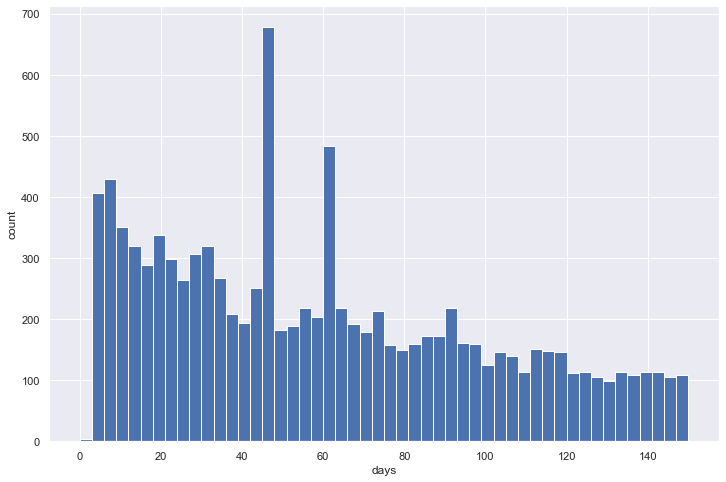

In [81]:
df['days_exposition'].hist(range=(0, 150), bins=50);
plt.xlabel('days')
plt.ylabel('count');

In [82]:
print('Среднее количество дней продажи составляет:', round(df['days_exposition'].mean(), 1))
print('Медиана дней продажи составляет:', df['days_exposition'].median())
print('Мода дней продажи составляет:',  round(df['days_exposition'].mode().loc[0], 1))

Среднее количество дней продажи составляет: 175.6
Медиана дней продажи составляет: 95.0
Мода дней продажи составляет: 45.0


Обнаружены выбросы, большое количество квартир продается на 45 и ~63 день публикации. Эти аномалии очень похожи на техническую особенность самой платформы: вероятнее, в эти дни платформа автоматически убирает объявления, если пользователь его не продлил

Быстрыми продажами можно считать сделки, закрытые в первые 30 дней. Долгими - более 100 дней.

**Вывод:**

<div style="border:solid lightgreen 2px; padding: 20px">
       <li>Среднее количество дней продажи составляет: 182.3
       <li>Медиана дней продажи составляет: 96.0
       <li>Мода дней продажи составляет: 45.0
       <li>Обнаружены выбросы, большое количество квартир продается на 45 и ~63 день публикации.
<li>Быстрыми продажами можно считать сделки, закрытые в первые 30 дней. Долгими - более 150 дней.

**Факторы, влюяющие на общую (полную) стоимость объекта.**

**Общая площадь**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


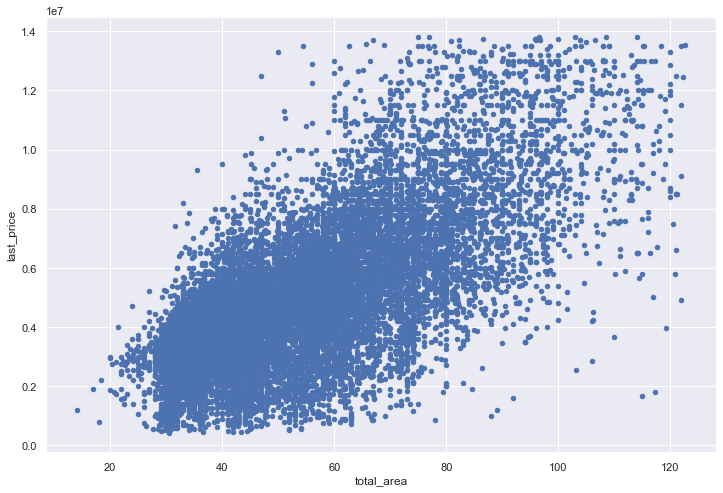

In [83]:
df.plot(x='total_area', y='last_price', kind='scatter');

**Корреляция параметров**

In [84]:
print(df['total_area'].corr(df['last_price']))

0.7055588584592138


Прослеживается линейная зависимость стоимости жилья от общей площади, что подтверждается корреляцией параметров.

**Жилая площадь**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


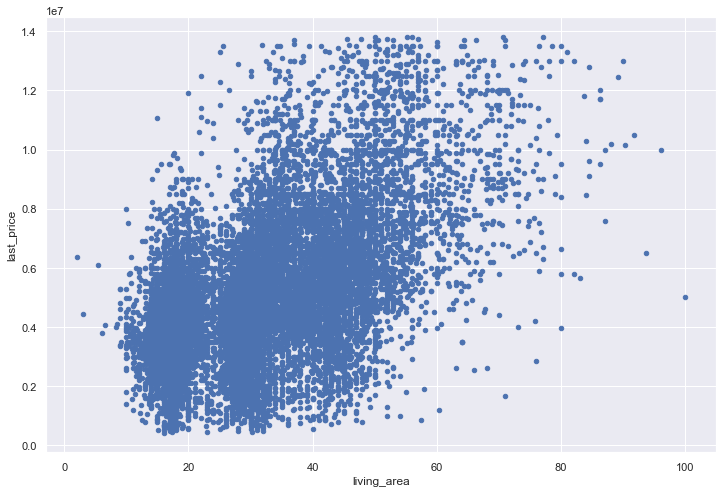

In [85]:
df.plot(x='living_area', y='last_price', kind='scatter');

**Корреляция параметров**

In [86]:
print(df['living_area'].corr(df['last_price']))

0.5811744748881837


Прослеживается неявная линейная зависимость стоимости жилья от жилой площади квартиры.

**Площадь кухни**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


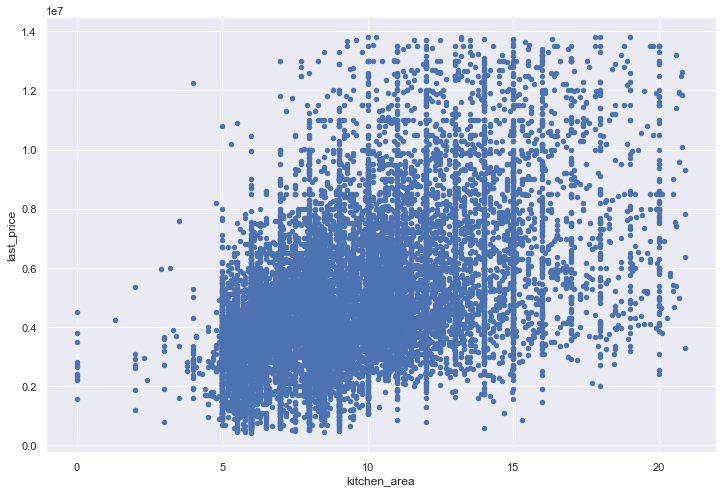

In [87]:
df.plot(x='kitchen_area', y='last_price', kind='scatter');

**Корреляция параметров**

In [88]:
print(df['kitchen_area'].corr(df['last_price']))

0.5070474967045618


Зависимость стоимости жилья от величины кухни незначительна.

**Количество комнат**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


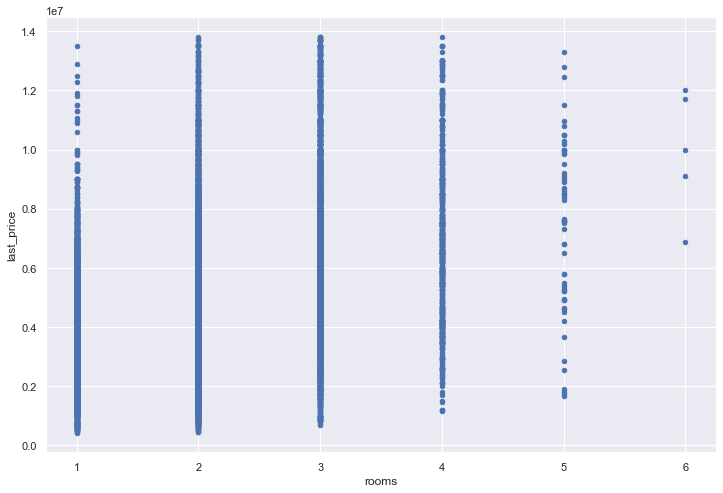

In [89]:
df.plot(x='rooms', y='last_price', kind='scatter');

**Корреляция параметров**

In [90]:
print(df['rooms'].corr(df['last_price']))

0.4380613816081673


Стоимость квартиры не зависит от количества комнат, однако предложений 2-3 комнатных квартир существенно больше в разном ценовом диапазоне.

**Этажность**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


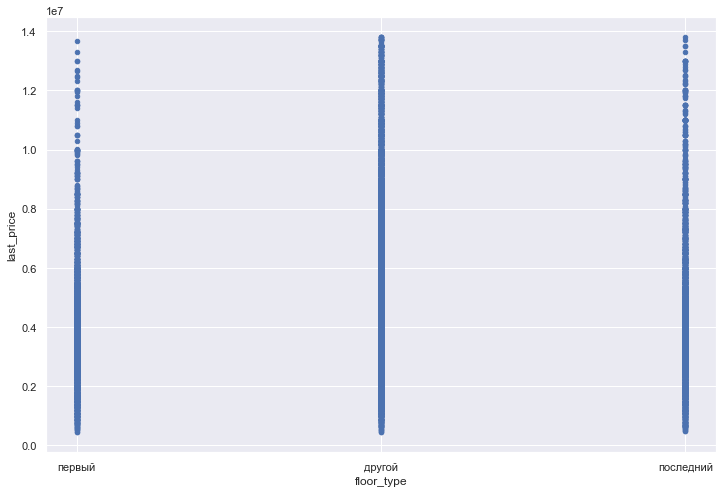

In [91]:
df.plot(x='floor_type', y='last_price', kind='scatter');

Квартиры, расположенные не на 1 и последнем этажах, стоят дороже.

**День недели**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


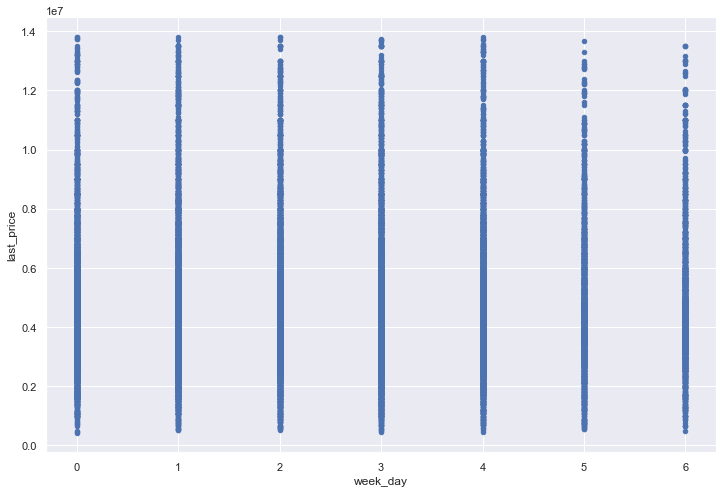

In [92]:
df.plot(x='week_day', y='last_price', kind='scatter');

**Корреляция параметров**

In [93]:
print(df['week_day'].corr(df['last_price']))

-0.01244777151305345


Стоимость квартиры не зависит от дня недели, однако в будни стоимость выше, чем в выходные дни.

**Месяц**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


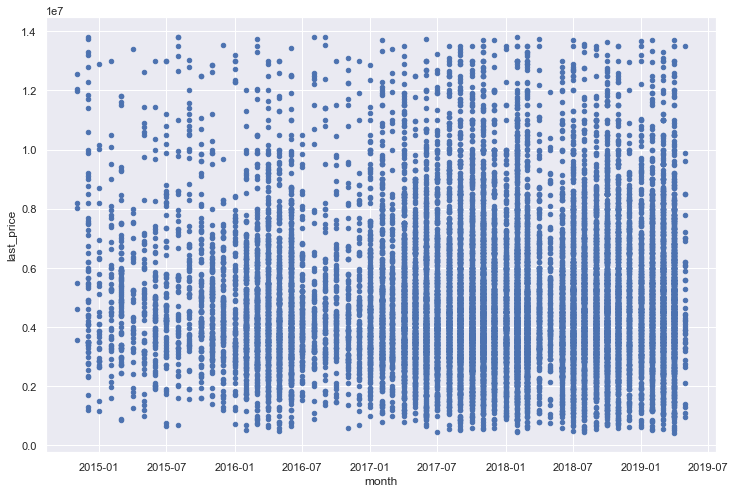

In [94]:
df.plot(x='month', y='last_price', kind='scatter');

**Корреляция параметров**

**Год**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


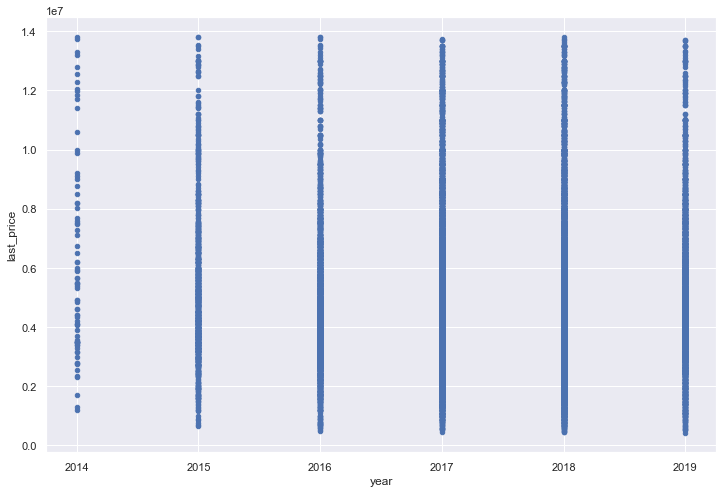

In [99]:
df.plot(x='year', y='last_price', kind='scatter');

**Корреляция параметров**

In [100]:
print(df['year'].corr(df['last_price']))

0.00040833940879594395


Дороже всего квартиры были в 2017 и 2018 годах. Корреляция отсутствует.

**Динамика стоимости и площади квартир по годам**

In [101]:
df.pivot_table(index='year', values=['last_price', 'total_area'], aggfunc='median')

,last_price,total_area
year,,
2014,5500000,62.00
2015,4700000,54.70
2016,4200000,50.00
2017,4290000,48.80
2018,4400000,48.00
2019,4750000,48.65


**Вывод:**

<div style="border:solid lightgreen 2px; padding: 20px">
<li>Прослеживается линейная зависимость стоимости жилья от общей площади, что подтверждается корреляцией параметров.
<li>Прослеживается неявная линейная зависимость стоимости жилья от жилой площади квартиры.
<li>Зависимость стоимости жилья от величины кухни незначительна.
    <li>Стоимость квартиры не зависит от количества комнат, однако предложений 2-3 комнатных квартир существенно больше в разном ценовом диапазоне.
    <li>Квартиры, расположенные не на 1 и последнем этажах, стоят дороже.
    <li>Стоимость квартиры не зависит от дня недели, однако в будни стоимость выше, чем в выходные дни.
    <li>Стоимость квартиры не зависит от месяца года.
    <li>Дороже всего квартиры были в 2015 и 2017 годах.

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [102]:
top_cities = df.groupby('locality_name').agg({'m2_price': ['count', 'median']})

In [103]:
top_cities.sort_values([('m2_price', 'count')], ascending=False).head(10)

m2_price               
                   count         median
locality_name                          
Санкт-Петербург    11908  101969.374856
Мурино               475   84968.750000
Шушары               392   77048.494983
Кудрово              374   95985.775249
Всеволожск           346   65737.874097
Колпино              306   74723.748474
Пушкин               288   98244.724026
Парголово            288   92271.978022
Гатчина              285   67695.961995
Петергоф             180   81838.294449

**Населённые пункты с самой высокой стоимостью квадратного метра**

In [104]:
top_cities = df.groupby('locality_name').agg({'m2_price': ['median']})

In [105]:
top_cities.sort_values([('m2_price', 'median')], ascending=False).head(10)

,m2_price
,median
locality_name,
Санкт-Петербург,101969.374856
Сестрорецк,99375.000000
Зеленогорск,98596.112311
Пушкин,98244.724026
Кудрово,95985.775249
Парголово,92271.978022
Мистолово,90229.885057
Стрельна,87741.935484


**Населённые пункты с самой низкой стоимостью квадратного метра**

In [106]:
top_cities.sort_values([('m2_price', 'median')]).head(10)

,m2_price
,median
locality_name,
Старополье,10368.663594
Ям-Тесово,12328.767123
Выскатка,12335.480902
Совхозный,12555.555556
Ефимовский,12686.567164
Малая Романовка,12724.550898
Тесово-4,12931.034483
Сижно,13709.677419


**Средняя цена киломенра до центра в Санкт-Петербурге**

In [107]:
spb_km_price_df = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest != 0')

In [108]:
spb_km_price_df['price_per_city_center_km'] = spb_km_price_df['last_price'] / spb_km_price_df['cityCenters_nearest']

In [109]:
print('Средняя стоимость километра в Санкт-Петербурге:', round(spb_km_price_df['price_per_city_center_km'].mean()))

Средняя стоимость километра в Санкт-Петербурге: 624740


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


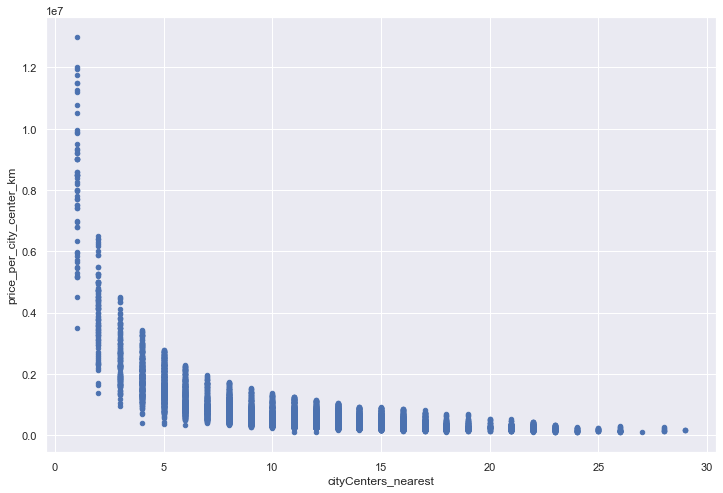

In [110]:
spb_km_price_df.plot(x='cityCenters_nearest', y='price_per_city_center_km', kind='scatter');

Как видно на графике выше, чем ближе квартира к центру города, тем выше ее цена.

**Отношение расстояния квартиры от центра и стоимостью квартиры на данном км**

In [111]:
nearest_to_price = spb_km_price_df.pivot_table(index = 'cityCenters_nearest', values = 'price_per_city_center_km', aggfunc='median')

In [112]:
nearest_to_price

,price_per_city_center_km
cityCenters_nearest,
1.0,8.250000e+06
2.0,4.100000e+06
3.0,2.341667e+06
4.0,1.875000e+06
5.0,1.515000e+06
6.0,1.122967e+06
7.0,8.914286e+05
8.0,7.750000e+05
9.0,5.566667e+05


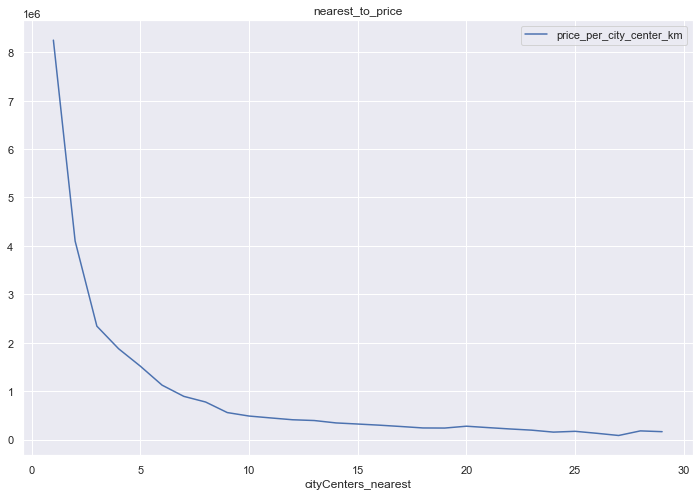

In [113]:
nearest_to_price.plot(title = 'nearest_to_price');

Как видно на графике стоимость снижается в соответствии с удалением от центра города.

**Вывод:**

<div style="border:solid lightgreen 2px; padding: 20px">
Средняя стоимость километра в Санкт-Петербурге составила 1331018. <br>Чем ближе квартира к центру города, тем выше ее цена.

### Общий вывод

<div style="border:solid lightgreen 2px; padding: 20px">
    
В данном исследовании был проведен анализ данных сервиса Яндекс.Недвижимость. Найдены закономерности и коррелирующие характеристики.    
    
<h3>Предобработка данных</h3>   
<li>Были удалены строки с отсутствующим значением locality_name, пропущенные значения is_apartment приведены к значению False, пропущенные значения balcony приравнены к 0, пропущенные значения ceiling_height расчитаны по медиане значений ceiling_height, пропущенные значения floors_total расчитаны по среднему, kitchen_area осносящихся к studio приравнены к 0. Остальные параметры остались без изменений.
<li>Ликвидированы неявные дубли в колонке locality_name путем выделения типа городского объекта в отдельный столбец.  
<li>Скорректированы аномальные значения в колонках ceiling_height, last_price, rooms, kitchen_area, total_area, остальные колонки не имеют аномальных значений. В общей сложности удалено ~ 22% первоначальной даты.  
<br>
<br>    
    <h3>Исследовательский анализ данных</h3>
<li>График общей площади помещения немного смещен влево по причине того, что были удалены не все выбросы. Больше всего в продаже квартир ~ 50 кв. метров.
<li>График жилой площади включает несколько пиков: ~ 20 и 50 кв. метров.
<li>Самый распростаненный показатель площади кухни ~ 10 кв. метров. Большинство квартир оцениваются ~ 500 000.
<li>Количество 1 и 2 комнатных квартир схоже, с увеличением количества комнат уменьшается количество предложений.
<li>Подавляющее большинство квартир с высотой потолков 2.6 метра.
<li>Большинство квартир не на первом и последнем этажах.
<li>Большинство квартир состоят из 5 этажей, так же много 10-этажных строений.
<li>В среднем расстояние до центра города составляет 15 км.
<li>Расстояние до ближайшего аэропорта не имеет существенной динамики и составляет около 15 км.
<li>До ближайшего парка в среднем около 500 метров.
<li>В основном объяления публикуются в рабочие дни, больше всего во вт и чт.
<li>Пик публикаций объявлений приходится на февраль-апрель, сентябрь-ноябрь.
<li>Прослеживается линейная зависимость стоимости жилья от общей площади, что подтверждается корреляцией параметров.
<li>Прослеживается неявная линейная зависимость стоимости жилья от жилой площади квартиры.
<li>Зависимость стоимости жилья от величины кухни незначительна.
<li>Стоимость квартиры не зависит от количества комнат, однако предложений 2-3 комнатных квартир существенно больше в разном ценовом диапазоне.
<li>Квартиры, расположенные не на 1 и последнем этажах, стоят дороже.
<li>Стоимость квартиры не зависит от дня недели, однако в будни стоимость выше, чем в выходные дни.
<li>Стоимость квартиры не зависит от месяца года.
<li>Дороже всего квартиры были в 2015 и 2017 годах.    
<br>
<br>       
    
<h3>Основные параметры, влияющие на определение стоимости недвижимости:</h3>
<li>Удаленность от центра города (чем ближе, тем объект недвижимости дороже).        
<li>Прослеживается влияние общей площади недвижимости на стоимость.
<li>Прослеживается влияние жилой площади недвижимости.
<li>Квартиры, расположенные не на 1 и последнем этажах, стоят дороже.  